In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
inputdir = Path('inputfiles')
figuredir = Path('output')
outputdir = Path('../1_Export')
if not figuredir.is_dir(): figuredir.mkdir()

# Read data

## Read additional files used for post-processing

In [3]:
meetpuntenfile = inputdir / 'Meetpunten.xlsx'
meetp = pd.read_excel(meetpuntenfile, index_col=3)
meetp = meetp[~meetp.index.duplicated(keep='first')]
meetp = meetp[~meetp['Locatie'].str.contains('#')]
# meetp.head()

In [4]:
longitudinalrkmfile = inputdir / 'Longitudinal_rkm.xlsx'
rkm = pd.read_excel(longitudinalrkmfile, index_col=None)
# rkm.head(50)

## Read model output

In [5]:
statistics = pd.read_pickle(outputdir / 'Observationpoint_statistics.pkl') 
statistics.head()

bed2018_Q0700                                              \
             water_depth                                               
                    mean           std       min        5%       25%   
10.00_MA        5.966429  8.823883e-08  5.966428  5.966428  5.966429   
100.00_MA       6.977767  5.085226e-02  6.854975  6.873202  6.945064   
1000.00_IJ      7.516348  1.374691e-05  7.516329  7.516330  7.516336   
1001.00_IJ      6.693996  1.335842e-05  6.693977  6.693979  6.693984   
1002.00_IJ      7.310112  1.284935e-05  7.310094  7.310095  7.310100   

                                                                    ...  \
                                                   water_discharge  ...   
                 50%       75%       95%       max            mean  ...   
10.00_MA    5.966429  5.966429  5.966429  5.966429       24.999999  ...   
100.00_MA   7.001177  7.019805  7.021629  7.022179       14.144948  ...   
1000.00_IJ  7.516346  7.516359  7.516372  7.516376      103.151301  ...   
1001.00_IJ  6.693994  6.694007  6.694020  6.694024      103.151417  ...   
1002.00_IJ  7.310109  7.310122  7.310134  7.310138       27.276514  ...   

           bed2050_Q1800                                                   \
             water_level water_velocity                                     
                     max           mean           std       min        5%   
10.00_MA       44.071878       0.211112  1.570512e-08  0.211112  0.211112   
100.00_MA      14.082294       0.180116  1.224238e-02  0.162275  0.162410   
1000.00_IJ     -0.233378       0.270057  5.347995e-06  0.270050  0.270050   
1001.00_IJ     -0.242031       0.334685  6.628874e-06  0.334676  0.334677   
1002.00_IJ     -0.251916       0.129619  2.113006e-06  0.129616  0.129616   

                                                              
                                                              
                 25%       50%       75%       95%       max  
10.00_MA    0.211112  0.211112  0.211112  0.211112  0.211112  
100.00_MA   0.170399  0.179553  0.188918  0.200092  0.208603  
1000.00_IJ  0.270052  0.270056  0.270061  0.270067  0.270068  
1001.00_IJ  0.334680  0.334684  0.334691  0.334697  0.334699  
1002.00_IJ  0.129617  0.129619  0.129621  0.129623  0.129623  

[5 rows x 360 columns]

In [6]:
# sim_names = statistics.columns.levels[0]
# sim_names_renamer = {s: s.replace('rmm', 'bed') for s in sim_names}
# statistics.rename(mapper=sim_names_renamer, axis=1, level=0, inplace=True)

In [7]:
# simulations = waterlevel.columns
simulations = ['bed2018_Q0700', 'bed2018_Q0850', 'bed2018_Q1020', 'bed2018_Q1400', 'bed2018_Q1800', 'bed2050_Q0700', 'bed2050_Q0850', 'bed2050_Q1020', 'bed2050_Q1400', 'bed2050_Q1800',]
discharges = [s.split('_')[1] for s in simulations[:5]]
bedlevels = ['bed2018', 'bed2050']

# Longitudinal plots

In [8]:
linestyles = {'bed2018': '-', 'bed2050': ':'}
colors = {
    'Q0700': 'C0', 
    'Q0850': 'C1', 
    'Q1020': 'C2', 
    'Q1400': 'C3', 
    'Q1800': 'C4', 
}

In [9]:
# Create legends
def add_legends(ax, includeDischarge=True, includeBedlevel=True):
    if includeDischarge:
        legend_discharge = plt.legend([Line2D([], [], color=v) for k,v in colors.items()], colors.keys(), loc=2, bbox_to_anchor=(1,0.5), title='Afvoer Lobith')
    
    if includeBedlevel:
        legend_bedlevel  = plt.legend([Line2D([], [], linestyle=v, color='k') for k,v in linestyles.items()], linestyles.keys(), loc=3, bbox_to_anchor=(1,0), title='Bodemhoogte')
    if includeDischarge and includeBedlevel:
        ax.add_artist(legend_discharge)

In [10]:
def plotMeetpuntenForRKM(meetp, rkm):
    rkm = rkm[:-1]  # Skip last
    for il, l in enumerate(rkm):
        if l in meetp.index:
            plt.axvline(il, color='#777777',linewidth=1, linestyle='--')
            plt.annotate(meetp['Locatie'].loc[l], xy=(il, plt.gca().get_ylim()[1]), xytext = (-1,-2), textcoords='offset points',rotation='vertical',ha='right',va='top', color='#777777')

# Bodemhoogte

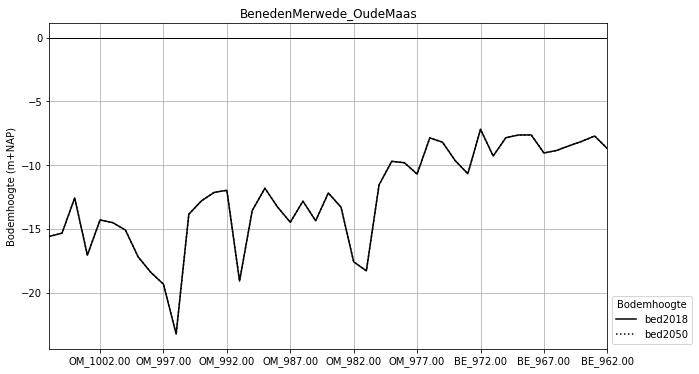

In [11]:
figuresubdir = figuredir / 'Longitudinal_bedlevel'
if not figuresubdir.is_dir(): figuresubdir.mkdir()

waterlevel = statistics.xs('water_level', axis=1, level=1).xs('min', axis=1, level=-1)    
waterdepth = statistics.xs('water_depth', axis=1, level=1).xs('min', axis=1, level=-1)    
bedlevel = waterlevel - waterdepth

for s in rkm.columns:
    l = rkm[s].dropna()
    plt.close()
    for b in bedlevels:
        ls = linestyles[b]
                
        sim = f'{b}_{discharges[0]}'
        bedlevel[sim][l].T.plot(legend=None, figsize=(10,6), color='k', ls=ls, zorder=3)
        
    ax = plt.gca()
    ax.invert_xaxis()
    plt.axhline(0, zorder=2, color='k', lw=1)
    plotMeetpuntenForRKM(meetp, l)
    plt.ylabel('Bodemhoogte (m+NAP)')
    plt.xlabel('')
    plt.title(f'{s}')
    plt.grid()
    add_legends(ax, includeDischarge=False)
    plt.savefig(figuresubdir / f'Bedlevel_{s}.png', dpi=150, bbox_inches='tight')
    plt.savefig(figuresubdir / f'Bedlevel_{s}.svg', bbox_inches='tight')

# Bedlevel change

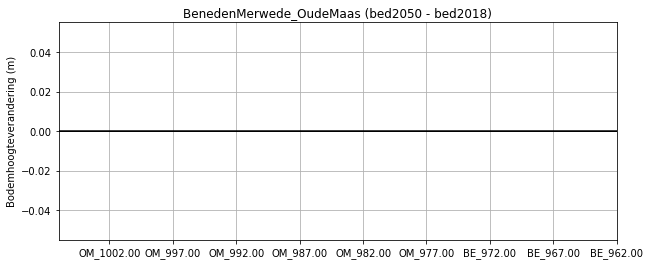

In [12]:
figuresubdir = figuredir / 'Longitudinal_bedlevel_change'
if not figuresubdir.is_dir(): figuresubdir.mkdir()

waterlevel = statistics.xs('water_level', axis=1, level=1).xs('min', axis=1, level=-1)    
waterdepth = statistics.xs('water_depth', axis=1, level=1).xs('min', axis=1, level=-1)    
bedlevel = waterlevel - waterdepth

for s in rkm.columns:
    l = rkm[s].dropna()
    plt.close()
    ls = linestyles[b]

    sim_0 = f'{bedlevels[0]}_{discharges[0]}'
    sim_1 = f'{bedlevels[1]}_{discharges[0]}'
    dH = bedlevel[sim_1] - bedlevel[sim_0]
    dH[l].T.plot(legend=None, figsize=(10,4), color='k', zorder=3)
        
    ax = plt.gca()
    ax.invert_xaxis()
    plt.axhline(0, zorder=2, color='k', lw=1)
    plotMeetpuntenForRKM(meetp, l)
    plt.ylabel('Bodemhoogteverandering (m)')
    plt.xlabel('')
    plt.title(f'{s} ({bedlevels[1]} - {bedlevels[0]})')
    plt.grid()
    plt.savefig(figuresubdir / f'Bedlevel_change_{s}.png', dpi=150, bbox_inches='tight')
    plt.savefig(figuresubdir / f'Bedlevel_change_{s}.svg', bbox_inches='tight')

# Longitudinal Waterlevel

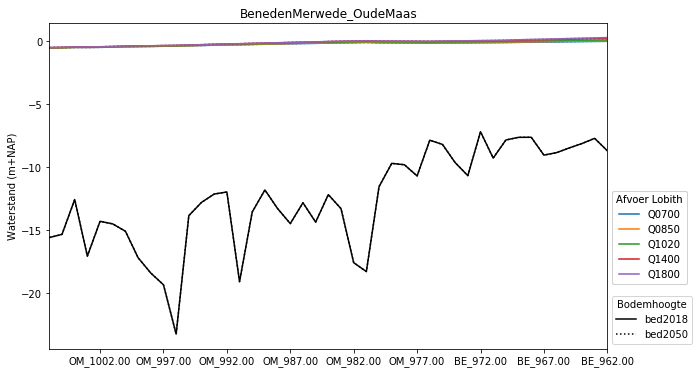

In [13]:
figuresubdir = figuredir / 'Longitudinal_waterlevel'
if not figuresubdir.is_dir(): figuresubdir.mkdir()

figuresubdir2 = figuredir / 'Longitudinal_waterlevel_withBed'
if not figuresubdir2.is_dir(): figuresubdir2.mkdir()
    
waterlevel = statistics.xs('water_level', axis=1, level=1).xs('min', axis=1, level=-1)    
waterdepth = statistics.xs('water_depth', axis=1, level=1).xs('min', axis=1, level=-1)    
bedlevel = waterlevel - waterdepth

for s in rkm.columns:
    l = rkm[s].dropna()
    plt.close()
    for sim in simulations:
        
        ls = linestyles[sim.split('_')[0]]
        c = colors[sim.split('_')[1]]
        
        waterlevel[sim][l].T.plot(legend=None, figsize=(10,6), ls=ls, color=c)
        
    ax = plt.gca()
    ax.invert_xaxis()
    plotMeetpuntenForRKM(meetp, l)
    plt.ylabel('Waterstand (m+NAP)')
    plt.xlabel('')
    plt.title(f'{s}')
    plt.grid()
    add_legends(ax)

    plt.savefig(figuresubdir / f'Waterlevel_{s}.png', dpi=150, bbox_inches='tight')
    plt.savefig(figuresubdir / f'Waterlevel_{s}.svg', bbox_inches='tight')
    
    for b in bedlevels:
        ls = linestyles[b]
                
        sim = f'{b}_{discharges[0]}'
        bedlevel[sim][l].T.plot(legend=None, figsize=(10,6), color='k', ls=ls, zorder=3)
        
    ax.invert_xaxis()
    add_legends(ax)
    plt.xlabel('')
    plt.savefig(figuresubdir2 / f'Waterlevel_{s}.png', dpi=150, bbox_inches='tight')
    plt.savefig(figuresubdir2 / f'Waterlevel_{s}.svg', bbox_inches='tight')
    
    

# Waterlevel including bed level

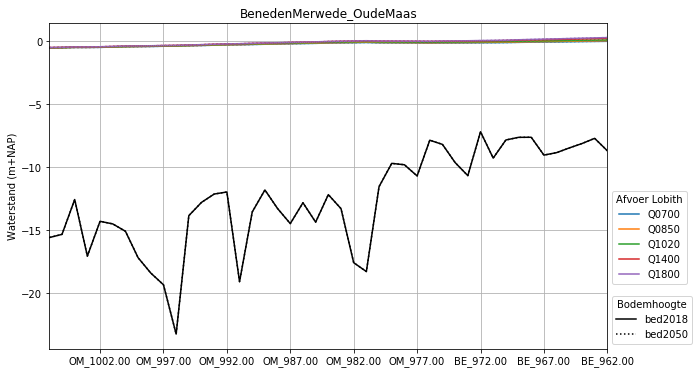

In [14]:
figuresubdir = figuredir / 'Longitudinal_waterlevel_withBed'
if not figuresubdir.is_dir(): figuresubdir.mkdir()
    
waterlevel = statistics.xs('water_level', axis=1, level=1).xs('min', axis=1, level=-1)    
waterdepth = statistics.xs('water_depth', axis=1, level=1).xs('min', axis=1, level=-1)    
bedlevel = waterlevel - waterdepth

for s in rkm.columns:
    l = rkm[s].dropna()
    plt.close()
    for sim in simulations:
        
        ls = linestyles[sim.split('_')[0]]
        c = colors[sim.split('_')[1]]
        
        waterlevel[sim][l].T.plot(legend=None, figsize=(10,6), ls=ls, color=c)

    for b in bedlevels:
        ls = linestyles[b]
                
        sim = f'{b}_{discharges[0]}'
        bedlevel[sim][l].T.plot(legend=None, figsize=(10,6), color='k', ls=ls, zorder=3)
        

    ax = plt.gca()
    ax.invert_xaxis()
    plotMeetpuntenForRKM(meetp, l)
    plt.ylabel('Waterstand (m+NAP)')
    plt.xlabel('')
    plt.title(f'{s}')
    plt.grid()
    add_legends(ax)
    plt.savefig(figuresubdir / f'Waterlevel_{s}.png', dpi=150, bbox_inches='tight')
    plt.savefig(figuresubdir / f'Waterlevel_{s}.svg', bbox_inches='tight')
    
    

# Bedlevel change

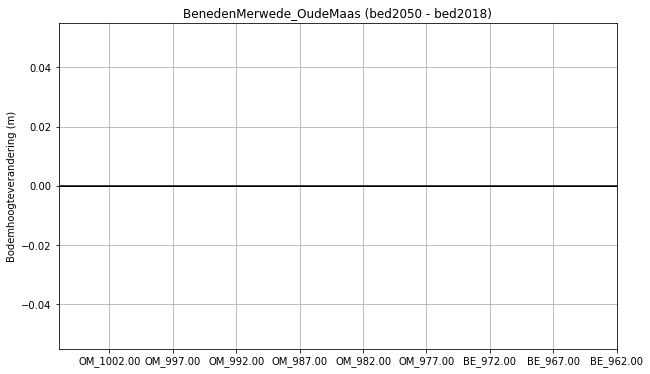

In [15]:
figuresubdir = figuredir / 'Longitudinal_bedlevel_change'
if not figuresubdir.is_dir(): figuresubdir.mkdir()

waterlevel = statistics.xs('water_level', axis=1, level=1).xs('min', axis=1, level=-1)    
waterdepth = statistics.xs('water_depth', axis=1, level=1).xs('min', axis=1, level=-1)    
bedlevel = waterlevel - waterdepth

for s in rkm.columns:
    l = rkm[s].dropna()
    plt.close()
    ls = linestyles[b]

    sim_0 = f'{bedlevels[0]}_{discharges[0]}'
    sim_1 = f'{bedlevels[1]}_{discharges[0]}'
    dH = bedlevel[sim_1] - bedlevel[sim_0]
    dH[l].T.plot(legend=None, figsize=(10,6), color='k', zorder=3)
        
    ax = plt.gca()
    ax.invert_xaxis()
    plt.axhline(0, zorder=2, color='k', lw=1)
    plotMeetpuntenForRKM(meetp, l)
    plt.ylabel('Bodemhoogteverandering (m)')
    plt.xlabel('')
    plt.title(f'{s} ({bedlevels[1]} - {bedlevels[0]})')
    plt.grid()
    plt.savefig(figuresubdir / f'Bedlevel_change_{s}.png', dpi=150, bbox_inches='tight')
    plt.savefig(figuresubdir / f'Bedlevel_change_{s}.svg', bbox_inches='tight')

# Longitudinal water level difference

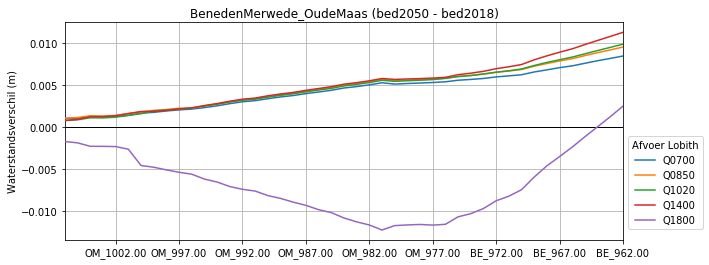

In [16]:
figuresubdir = figuredir / 'Longitudinal_waterlevel_diff'
if not figuresubdir.is_dir(): figuresubdir.mkdir()

waterlevel = statistics.xs('water_level', axis=1, level=1).xs('min', axis=1, level=-1)    
    
for s in rkm.columns:
    l = rkm[s].dropna()
    plt.close()
    for Q in discharges:
        
        c = colors[Q]
        
        sim_0 = f'{bedlevels[0]}_{Q}'
        sim_1 = f'{bedlevels[1]}_{Q}'
        
        dH = waterlevel[sim_1] - waterlevel[sim_0]
        dH[l].T.plot(legend=None, figsize=(10,4), color=c, zorder=3)
        
    ax = plt.gca()
    ax.invert_xaxis()
    plt.axhline(0, zorder=2, color='k', lw=1)
    plotMeetpuntenForRKM(meetp, l)
    plt.ylabel('Waterstandsverschil (m)')
    plt.xlabel('')
    plt.title(f'{s} ({bedlevels[1]} - {bedlevels[0]})')
    plt.grid()
    add_legends(ax, includeBedlevel=False)
    plt.savefig(figuresubdir / f'Waterlevel_difference_{s}.png', dpi=150, bbox_inches='tight')
    plt.savefig(figuresubdir / f'Waterlevel_difference_{s}.svg', bbox_inches='tight')


# Longitudinal discharge

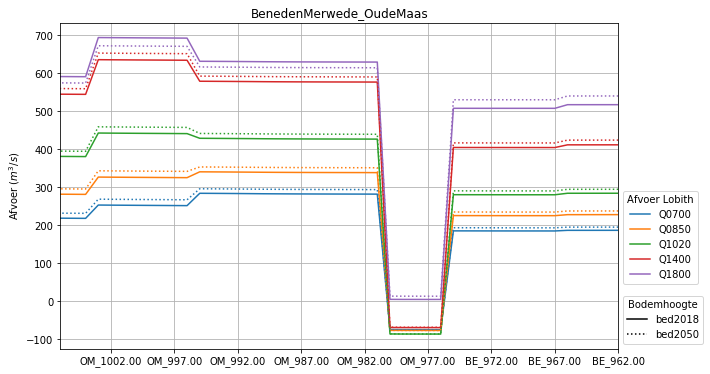

In [17]:
figuresubdir = figuredir / 'Longitudinal_discharge'
if not figuresubdir.is_dir(): figuresubdir.mkdir()

discharge = statistics.xs('water_discharge', axis=1, level=1).xs('mean', axis=1, level=-1)    

    
for s in rkm.columns:
    l = rkm[s].dropna()
    plt.close()
    for sim in simulations:
        
        ls = linestyles[sim.split('_')[0]]
        c = colors[sim.split('_')[1]]
        
        discharge[sim][l].T.plot(legend=None, figsize=(10,6), ls=ls, color=c)
        
    ax = plt.gca()
    ax.invert_xaxis()
    plotMeetpuntenForRKM(meetp, l)
    plt.ylabel('Afvoer ($m^3/s$)')
    plt.xlabel('')
    plt.title(f'{s}')
    plt.grid()
    add_legends(ax)

    plt.savefig(figuresubdir / f'Discharge_{s}.png', dpi=150, bbox_inches='tight')
    plt.savefig(figuresubdir / f'Discharge_{s}.svg', bbox_inches='tight')

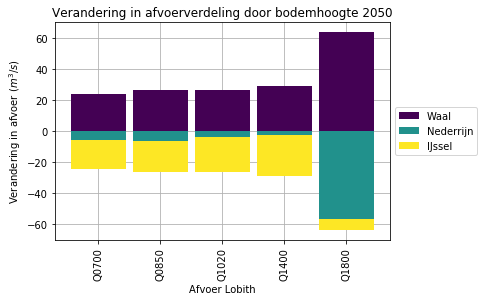

In [18]:
figuresubdir = figuredir / 'Discharge_distribution'
if not figuresubdir.is_dir(): figuresubdir.mkdir()

locations = ['868.00_WA', '879.00_NR','879.00_IJ']
locations_name = ['Waal','Nederrijn', 'IJssel']

dQ = {}
for Q in discharges:
    dQ[Q] = (discharge[f'bed2050_{Q}'] - discharge[f'bed2018_{Q}'])[locations]
dQ = pd.concat(dQ, axis=1)

dQ.T.plot.bar(width=0.9, stacked=True, zorder=3, cmap='viridis')
plt.title(f'Verandering in afvoerverdeling door bodemhoogte 2050')
plt.ylabel('Verandering in afvoer ($m^3/s$)')
plt.xlabel('Afvoer Lobith')
plt.grid()
plt.legend(locations_name, loc=6, bbox_to_anchor=(1,0.5))

plt.savefig(figuresubdir / f'Dischargedistribution_change.png', dpi=150, bbox_inches='tight')
plt.savefig(figuresubdir / f'Dischargedistribution_change.svg', bbox_inches='tight')

D:\software\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


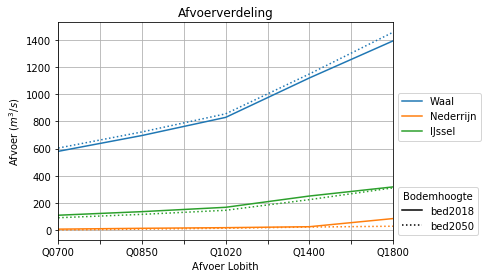

In [19]:
figuresubdir = figuredir / 'Discharge_distribution'
if not figuresubdir.is_dir(): figuresubdir.mkdir()

locations = ['868.00_WA', '879.00_NR','879.00_IJ']
locations_name = ['Waal','Nederrijn', 'IJssel']

f, ax = plt.subplots()
for bed in bedlevels:
    dQ = {}
    for Q in discharges:
        dQ[Q] = discharge[f'{bed}_{Q}'][locations]
    dQ = pd.concat(dQ, axis=1)

    dQ.T.plot(ax=ax, ls=linestyles[bed], colors=['C0', 'C1', 'C2'])
plt.title(f'Afvoerverdeling')
plt.ylabel('Afvoer ($m^3/s$)')
plt.xlabel('Afvoer Lobith')
plt.grid()
plt.legend(loc=6, bbox_to_anchor=(1,0.5))
legend_discharge = plt.legend([Line2D([], [], color=v) for v in ['C0', 'C1', 'C2']], locations_name, loc=2, bbox_to_anchor=(1,0.7))
legend_bedlevel  = plt.legend([Line2D([], [], linestyle=v, color='k') for k,v in linestyles.items()], linestyles.keys(), loc=3, bbox_to_anchor=(1,0), title='Bodemhoogte')
ax.add_artist(legend_discharge)

plt.savefig(figuresubdir / f'Dischargedistribution.png', dpi=150, bbox_inches='tight')
plt.savefig(figuresubdir / f'Dischargedistribution.svg', bbox_inches='tight')

# Getij

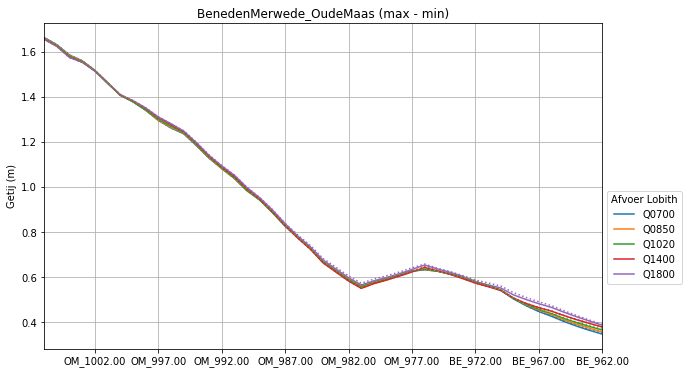

In [20]:
figuresubdir = figuredir / 'Longitudinal_waterlevel_getij'
if not figuresubdir.is_dir(): figuresubdir.mkdir()

    
waterlevel_min = statistics.xs('water_level', axis=1, level=1).xs('min', axis=1, level=-1)    
waterlevel_max = statistics.xs('water_level', axis=1, level=1).xs('max', axis=1, level=-1)    
waterlevel_diff = waterlevel_max - waterlevel_min

for s in rkm.columns:
    l = rkm[s].dropna()
    plt.close()
    for sim in simulations:
        
        ls = linestyles[sim.split('_')[0]]
        c = colors[sim.split('_')[1]]
        
        waterlevel_diff[sim][l].T.plot(legend=None, figsize=(10,6), ls=ls, color=c)
        
    ax = plt.gca()
    ax.invert_xaxis()
    plotMeetpuntenForRKM(meetp, l)
    plt.ylabel('Getij (m)')
    plt.xlabel('')
    plt.title(f'{s} (max - min)')
    plt.grid()
    add_legends(ax, includeBedlevel=False)

    plt.savefig(figuresubdir / f'Waterlevel_{s}.png', dpi=150, bbox_inches='tight')
    plt.savefig(figuresubdir / f'Waterlevel_{s}.svg', bbox_inches='tight')
